In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#model = LinearRegression()

In [150]:
data = pd.read_csv(r'E:\BI\atta\Python_visulization\practice\Regressions\Decission tree\data.csv')

In [151]:
data.head()

,Age,Height,weight,gender,likeness
0,27,170.69,76.0,Male,Biryani
1,41,165.00,70.0,Male,Biryani
2,29,171.00,80.0,Male,Biryani
3,27,173.00,102.0,Male,Biryani
4,29,164.00,67.0,Male,Biryani


Text(0, 0.5, 'heigh')

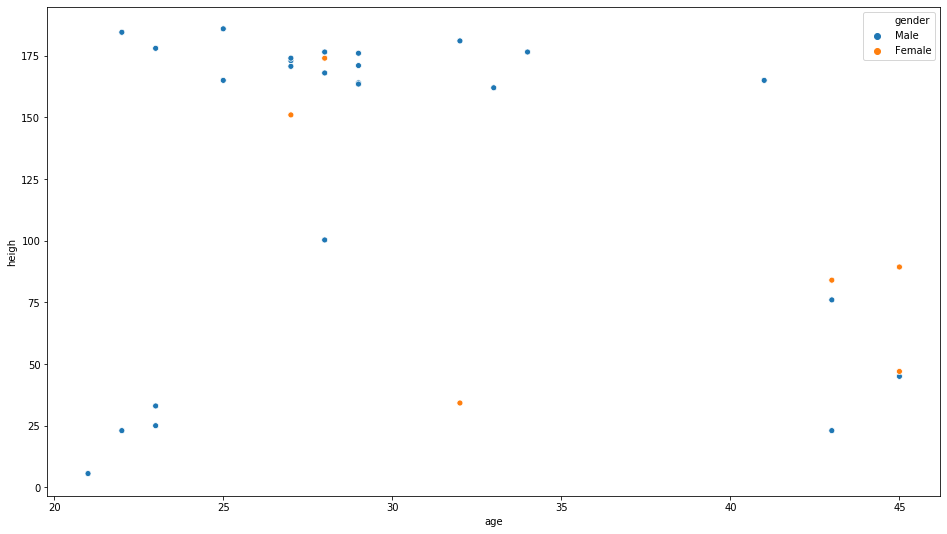

In [152]:
plt.figure(figsize=(16,9))
sns.scatterplot(data['Age'],data['Height'],hue= data['gender'])
plt.xlabel('age')
plt.ylabel('heigh')

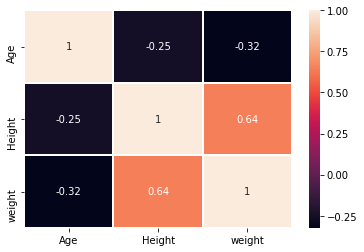

In [153]:
sns.heatmap(data.corr(), annot = True,linewidths=1)
plt.show()

In [154]:
data.tail()

,Age,Height,weight,gender,likeness
26,22,23.0,52.350238,Male,Biryani
27,23,25.0,50.410595,Male,Samosa
28,45,47.0,48.470952,Female,Biryani
29,43,84.0,46.531310,Female,Biryani
30,23,33.0,44.591667,Male,Pakora


In [155]:
# Replace male with 0 and Female with 1
data['gender'] = data['gender'].replace('Male',0)
data['gender'] = data['gender'].replace('Female',1)

In [156]:
data.head()

,Age,Height,weight,gender,likeness
0,27,170.69,76.0,0,Biryani
1,41,165.00,70.0,0,Biryani
2,29,171.00,80.0,0,Biryani
3,27,173.00,102.0,0,Biryani
4,29,164.00,67.0,0,Biryani


In [157]:
# selction of input and output varaible
x = data[['weight','gender']]
y = data['likeness']

In [158]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [159]:
#predict unknown value
model.predict([[11,1]])

array(['Samosa'], dtype=object)

In [160]:
model.score(x,y)

1.0

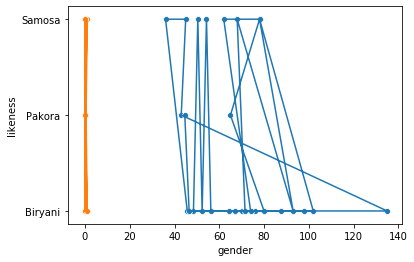

In [161]:
#draw predicted model on graph
sns.scatterplot(data['weight'],data['likeness'])
sns.scatterplot(data['gender'],data['likeness'])
#plt.plot(x_test,model.predict(x_test))
plt.plot(x,model.predict(x))

In [189]:
#split data into test train 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#assing 60 percent for test and 20 for testing
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.2)

In [190]:
#fit model of train test data
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [191]:
#test model
p_val = model.predict([[40,0]])
print('this body will like :' ,p_val)

this body will like : ['Pakora']


In [192]:
#predic all 20% testing data
model.predict(x_test)

array(['Samosa', 'Samosa', 'Biryani', 'Biryani', 'Biryani', 'Pakora',
       'Pakora'], dtype=object)

In [193]:
# check the accuracey of the model
score =accuracy_score(y_test,model.predict(x_test))
print('the score of the model is :',score)

the score of the model is : 0.5714285714285714


In [168]:
# train and save the model
#import joblib
#model.fit(x,y)
#joblib.dump(model,'food.joblib')